In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
new_df = pd.read_csv("/content/drive/MyDrive/datasets/aml/Dataset-SA.csv")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
print(f"Size of the dataset is {len(new_df)}")

Size of the dataset is 205052


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
print(f"Number of Unique Products are {len(new_df.product_name.unique())}")

Number of Unique Products are 958


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
new_df.info()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [130]:
new_df.describe()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


In [131]:
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Positive Sentiments: 81.24%
Negative Sentiments: 13.77%
Neutral Sentiments: 4.99%




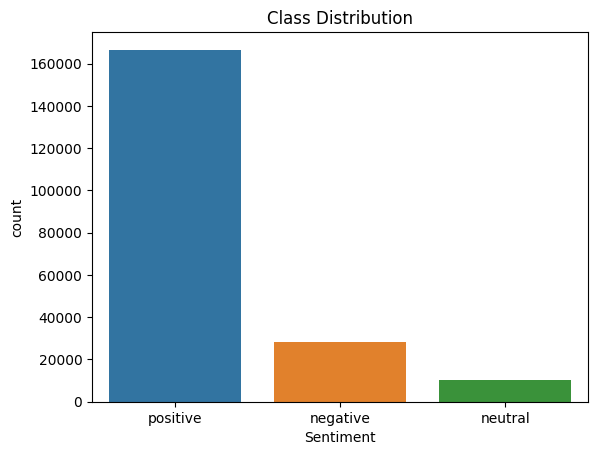

In [132]:
sns.countplot(x='Sentiment',data=new_df)
plt.title("Class Distribution")

print(f"""
Positive Sentiments: {round(new_df.Sentiment.value_counts()['positive']*100/new_df.Sentiment.value_counts().sum(), 2)}%
Negative Sentiments: {round(new_df.Sentiment.value_counts()['negative']*100/new_df.Sentiment.value_counts().sum(), 2)}%
Neutral Sentiments: {round(new_df.Sentiment.value_counts()['neutral']*100/new_df.Sentiment.value_counts().sum(), 2)}%

""")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Product Rating Distribution')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


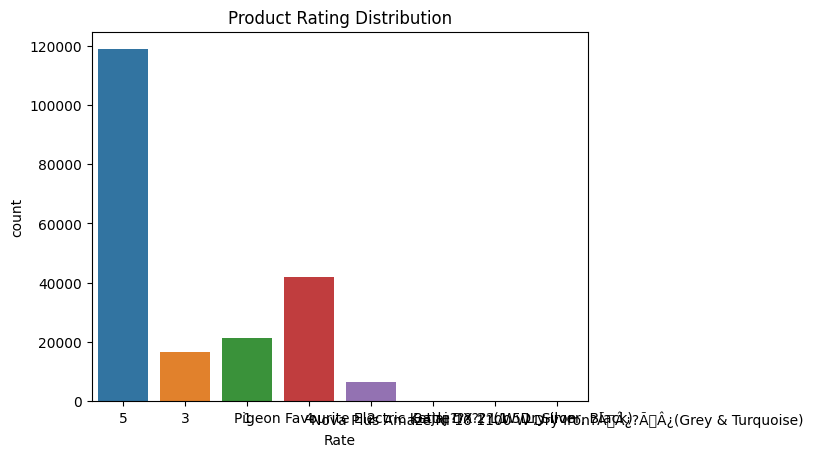

In [133]:
sns.countplot(x='Rate',data=new_df)
plt.title("Product Rating Distribution")

In [134]:
new_df.isna().sum()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [135]:
print("Summary has 11 Null values and Review has 24664")

Summary has 11 Null values and Review has 24664


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
new_df=new_df[~ new_df.Summary.isna()]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [138]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
summaries = new_df['Summary'].to_list()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
summaries[1]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'best budget 2 fit cooler nice cooling'

In [141]:
#Removing Stopwords
summaries_new = []

for summary in summaries:
  split_summary = summary.split()
  new_summary = ''
  for i in split_summary:
    if i not in stop_words:
      new_summary = new_summary + i + " "
  # print(new_summary)
  summaries_new.append(new_summary)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
len(summaries_new)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


205041

In [143]:
!python -m spacy download en_core_web_md 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2023-04-18 15:12:57.023330: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [144]:
import spacy

x = spacy.load('en_core_web_md', disable=['parser', 'ner'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [145]:
lemmatized_summaries = []

for summary in summaries_new:
  lm = x(summary)
  temp = []
  for i in lm:
    if i.pos_ in ['NOUN', 'ADJ']:
      temp.append(i.lemma_)
  lemmatized_summaries.append(temp)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
print(lemmatized_summaries[1])

['good', 'budget', 'fit', 'nice', 'cooling']


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [147]:
import gensim

dict_ = gensim.corpora.Dictionary(lemmatized_summaries)

matrix = []

for i in lemmatized_summaries:
  matrix.append(dict_.doc2bow(i))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [148]:
lda_model = gensim.models.ldamodel.LdaModel.load("/content/drive/MyDrive/datasets/aml/lda_model_10topics")


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
LDA = gensim.models.ldamodel.LdaModel
# Building LDA model
lda_model = LDA(corpus=matrix, id2word=dict_, num_topics=10, random_state=42,
                chunksize=800, passes=60,iterations=80)

In [149]:
lda_model.print_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.659*"good" + 0.139*"quality" + 0.042*"price" + 0.019*"design" + 0.013*"range" + 0.009*"piece" + 0.009*"overall" + 0.006*"fabulous" + 0.005*"fitting" + 0.005*"long"'),
 (1,
  '0.429*"nice" + 0.221*"product" + 0.100*"flipkart" + 0.058*"thank" + 0.057*"delivery" + 0.020*"satisfied" + 0.012*"fast" + 0.011*"packaging" + 0.009*"boy" + 0.006*"safe"'),
 (2,
  '0.149*"bad" + 0.063*"bowl" + 0.043*"installation" + 0.042*"item" + 0.031*"watch" + 0.030*"service" + 0.028*"packaging" + 0.022*"month" + 0.020*"average" + 0.018*"colour"'),
 (3,
  '0.489*"product" + 0.268*"good" + 0.065*"excellent" + 0.034*"beautiful" + 0.009*"comfortable" + 0.008*"family" + 0.007*"waste" + 0.006*"reasonable" + 0.006*"service" + 0.006*"book"'),
 (4,
  '0.193*"small" + 0.126*"size" + 0.060*"amazing" + 0.059*"great" + 0.033*"packing" + 0.032*"love" + 0.031*"perfect" + 0.026*"much" + 0.024*"superb" + 0.021*"big"'),
 (5,
  '0.233*"awesome" + 0.086*"quality" + 0.084*"little" + 0.064*"bit" + 0.059*"poor" + 0.022*"fli

In [20]:
lda_model.save("/content/drive/MyDrive/datasets/aml/lda_model_10topics")

In [150]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [151]:
!pip install pyLDAvis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, matrix, dict_)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.364940  0.084753       1        1  13.295446
0     -0.243027 -0.230002       2        1  12.727722
1     -0.217321  0.264234       3        1  11.734594
2      0.119827  0.093814       4        1   9.703975
5      0.082257 -0.214615       5        1   9.453453
4      0.140330  0.094902       6        1   9.225388
7      0.152243  0.075899       7        1   9.152212
6      0.020167 -0.297845       8        1   9.061690
9      0.155246  0.056599       9        1   8.101261
8      0.155217  0.072261      10        1   7.544260, topic_info=         Term          Freq         Total Category  logprob  loglift
12       good  81632.000000  81632.000000  Default  30.0000  30.0000
19    product  62067.000000  62067.000000  Default  29.0000  29.0000
13       nice  34413.000000  34413.000000  Default  28.0000  28.0000
16    quality  29021.000000  29021.000000  Default  27.0000  27.0000
23    awesome  15016.000000  15016.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
275      next    356.558155    357.684100  Topic10  -4.9734   2.5812
551     usage    345.076989    346.202979  Topic10  -5.0061   2.5811
285   storage    338.833107    339.959133  Topic10  -5.0244   2.5811
5298   dinner   3871.574708   4013.147995  Topic10  -2.5885   2.5485
274     month    458.491696   1938.957178  Topic10  -4.7220   1.1424

[353 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
89        2  0.984855         2nd
704       1  0.994868        able
631       2  0.992088   accessory
31        8  0.998735  affordable
1         6  0.999815     amazing
...     ...       ...         ...
287       8  0.999856       worth
288       7  0.998777      worthy
659       3  0.982525     writing
596       3  0.985101       wrong
231       6  0.998677        year

[337 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3, 6, 5, 8, 7, 10, 9])

In [152]:
x = lda_model[matrix]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
prob_list = []

for i in x:
  temp = []
  for a,b in i:
    temp.append(b)
  prob_list.append(temp)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
topics_list = []
for i in prob_list:
  topics_list.append(np.argmax(i))

new_df['topic'] = topics_list

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
new_df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_name,product_price,Rate,Review,Summary,Sentiment,topic
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,4
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,8
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,7
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,2
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,3


In [156]:
new_df.Sentiment.replace({'positive':2, 'neutral': 1, 'negative': 0}, inplace = True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [159]:
clusterwise_dist = {}

for topic in new_df.topic.unique():
  temp_df = new_df[new_df.topic == topic]
  if topic not in clusterwise_dist.keys():
    clusterwise_dist[topic] = {}
  clusterwise_dist[topic][0] = round(temp_df.Sentiment.value_counts()[0]/len(temp_df), 2)
  clusterwise_dist[topic][1] = round(temp_df.Sentiment.value_counts()[1]/len(temp_df), 2)
  clusterwise_dist[topic][2] = round(temp_df.Sentiment.value_counts()[2]/len(temp_df),2)
print(clusterwise_dist)

sentimentwise_dist = {}

for topic in new_df.topic.unique():
  temp_df = new_df[new_df.topic == topic]
  if topic not in sentimentwise_dist.keys():
    sentimentwise_dist[topic] = {}
  sentimentwise_dist[topic][0] = round(temp_df.Sentiment.value_counts()[0]/new_df.Sentiment.value_counts()[0], 2)
  sentimentwise_dist[topic][1] = round(temp_df.Sentiment.value_counts()[1]/new_df.Sentiment.value_counts()[1], 2)
  sentimentwise_dist[topic][2] = round(temp_df.Sentiment.value_counts()[2]/new_df.Sentiment.value_counts()[2], 2)
print(sentimentwise_dist)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{4: {0: 0.13, 1: 0.09, 2: 0.78}, 8: {0: 0.16, 1: 0.05, 2: 0.79}, 7: {0: 0.28, 1: 0.09, 2: 0.63}, 2: {0: 0.55, 1: 0.1, 2: 0.35}, 3: {0: 0.09, 1: 0.03, 2: 0.88}, 1: {0: 0.03, 1: 0.01, 2: 0.97}, 0: {0: 0.07, 1: 0.06, 2: 0.87}, 5: {0: 0.26, 1: 0.05, 2: 0.69}, 6: {0: 0.22, 1: 0.05, 2: 0.73}, 9: {0: 0.28, 1: 0.11, 2: 0.61}}
{4: {0: 0.05, 1: 0.1, 2: 0.06}, 8: {0: 0.04, 1: 0.03, 2: 0.03}, 7: {0: 0.06, 1: 0.05, 2: 0.02}, 2: {0: 0.27, 1: 0.14, 2: 0.03}, 3: {0: 0.1, 1: 0.09, 2: 0.17}, 1: {0: 0.04, 1: 0.04, 2: 0.24}, 0: {0: 0.16, 1: 0.37, 2: 0.32}, 5: {0: 0.11, 1: 0.05, 2: 0.05}, 6: {0: 0.12, 1: 0.07, 2: 0.07}, 9: {0: 0.05, 1: 0.06, 2: 0.02}}
